# Lung Cancer Diagnosis with Logistic Regression

In [1]:
# load lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2021)

In [2]:
# load data
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


## Data Check

In [3]:
# feature names
print(cancer["feature_names"])
# target names
print(cancer["target_names"])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [4]:
# get data and label (target)
data, target = cancer["data"], cancer["target"]

# print sample
print(data[0])
print(target[0])

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
0


## Data EDA

In [5]:
df = pd.DataFrame( data, columns=cancer["feature_names"] )
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df.shape

(569, 30)

(array([212.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 357.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

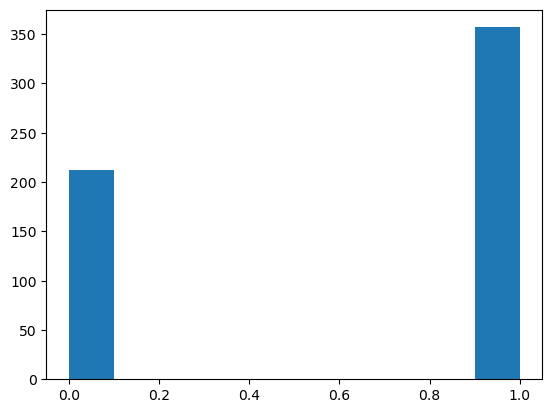

In [7]:
# count malignant and benign
pd.Series(target).value_counts()

# plot hist
plt.hist(target)

Text(0, 0.5, 'target')

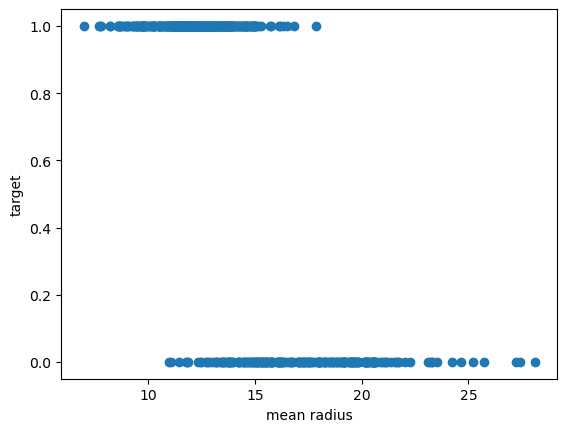

In [8]:
# check "mean radius" vs diagnosis
plt.scatter(x=data[:,0], y=target)
plt.xlabel("mean radius")
plt.ylabel("target")

## Data Split

In [9]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021,
)
print("train size : ", len(train_data))
print("test size : ", len(test_data))

train size :  398
test size :  171


## Linear Regression
### Let's run linear regression before logistic regression

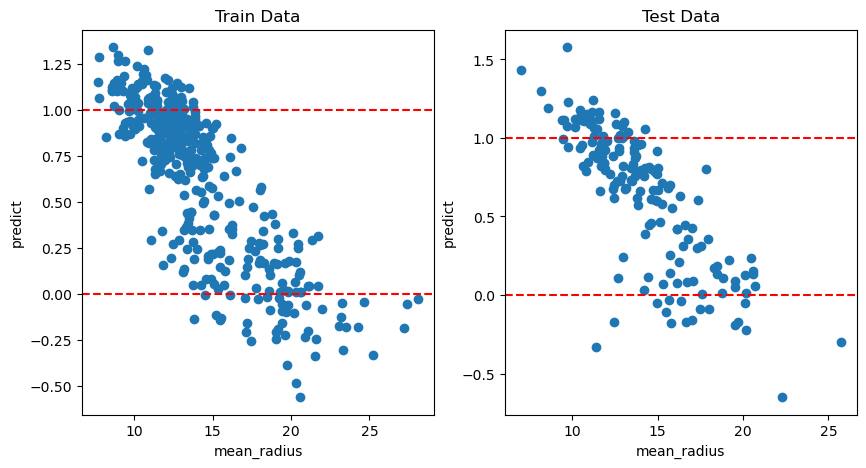

In [10]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(train_data, train_target)
train_pred = linear_regressor.predict(train_data)
test_pred = linear_regressor.predict(test_data)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
preds = [
    ("Train", train_data, train_pred),
    ("Test", test_data, test_pred),
]
for idx, (name, d, pred) in enumerate(preds):
    ax = axes[idx]
    ax.scatter(x=d[:,0], y=pred)
    ax.axhline(0, color="red", linestyle="--")
    ax.axhline(1, color="red", linestyle="--")
    ax.set_xlabel("mean_radius")
    ax.set_ylabel("predict")
    ax.set_title(f"{name} Data")

## Evaluation - Linear Regression

auroc is :  0.9979189189189189


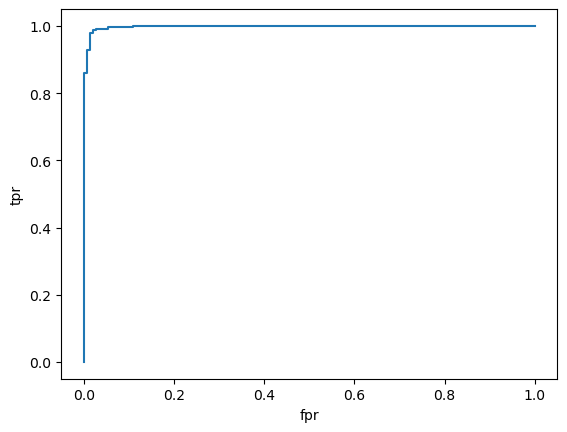

In [11]:
# plot ROC curve
from sklearn.metrics import auc, roc_curve
fpr, tpr, threshold = roc_curve( train_target, train_pred )
plt.plot(fpr, tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")
print("auroc is : ", auc(fpr, tpr) )

best threshold is : 0.5861
best sensitivity is : 0.9880
best specificity is : 0.9797
best threshold height is : 0.9677


Text(0, 0.5, 'tpr')

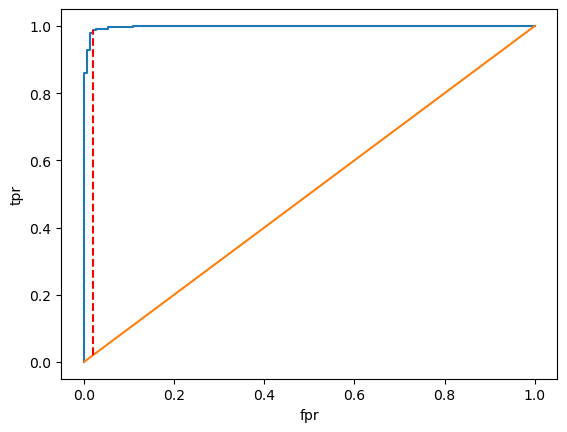

In [12]:
# find the best threshold by Youden's index
idx = np.argmax(tpr - fpr)
best_threshold = threshold[idx]
print(f"best threshold is : {best_threshold:.4f}")
print(f"best sensitivity is : {tpr[idx]:.4f}")
print(f"best specificity is : {1-fpr[idx]:.4f}")
print(f"best threshold height is : {(tpr - fpr)[idx]:.4f}")

plt.plot(fpr, tpr)
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
plt.plot((fpr[idx], fpr[idx]), (fpr[idx], tpr[idx]), color="red", linestyle="--")
plt.xlabel("fpr")
plt.ylabel("tpr")

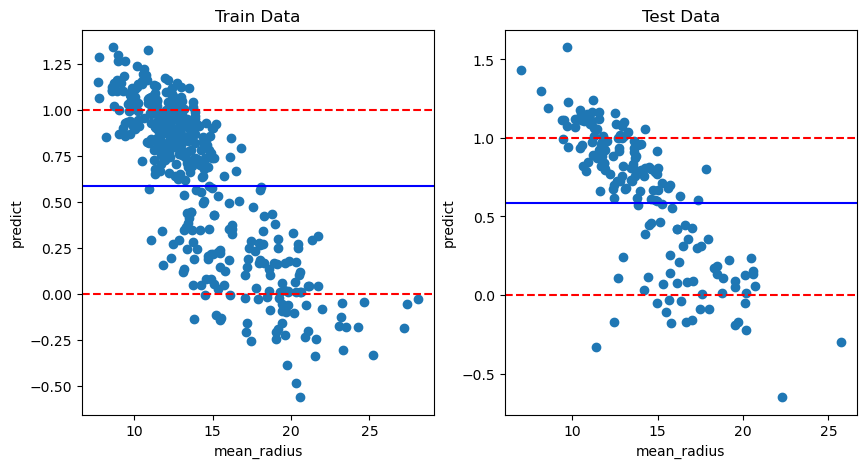

In [13]:
# plot the linear regression result with the best threshold
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
preds = [
    ("Train", train_data, train_pred),
    ("Test", test_data, test_pred),
]
for idx, (name, d, pred) in enumerate(preds):
    ax = axes[idx]
    ax.scatter(x=d[:,0], y=pred)
    ax.axhline(0, color="red", linestyle="--")
    ax.axhline(1, color="red", linestyle="--")
    ax.set_xlabel("mean_radius")
    ax.set_ylabel("predict")
    ax.set_title(f"{name} Data")
    ax.axhline(best_threshold, color="blue")

In [14]:
# get the accuracy for train and test
train_pred_label = list(map(int, (train_pred > best_threshold)))
test_pred_label = list(map(int, (test_pred > best_threshold)))
from sklearn.metrics import accuracy_score
linear_train_acc = accuracy_score( train_target, train_pred_label )
linear_test_acc = accuracy_score( test_target, test_pred_label )
print(f"train accuracy is : {linear_train_acc:.2f}")
print(f"test accuracy is : {linear_test_acc:.2f}")

train accuracy is : 0.98
test accuracy is : 0.96


## Logisitic Regression

In [15]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform( train_data )
scaled_test_data = scaler.transform( test_data )

In [16]:
# learning
from sklearn.linear_model import LogisticRegression
logit_regressor = LogisticRegression()
logit_regressor.fit(scaled_train_data, train_target)

LogisticRegression()

In [17]:
# prediction - best selection
train_pred = logit_regressor.predict(scaled_train_data)
test_pred = logit_regressor.predict(scaled_test_data)
print(train_pred[:10])
print(test_pred[:10])

[1 0 1 1 1 0 1 0 1 1]
[1 1 1 0 1 0 0 1 0 1]


In [18]:
# prediction - probability
train_pred_logit = logit_regressor.predict_proba(scaled_train_data)
test_pred_logit = logit_regressor.predict_proba(scaled_test_data)
print(train_pred_logit[:10])
print(test_pred_logit[:10])

[[9.59060420e-03 9.90409396e-01]
 [9.99999999e-01 1.13032510e-09]
 [1.99497746e-02 9.80050225e-01]
 [1.73725447e-06 9.99998263e-01]
 [4.84492935e-04 9.99515507e-01]
 [9.99999931e-01 6.90183171e-08]
 [2.91279039e-04 9.99708721e-01]
 [8.25103840e-01 1.74896160e-01]
 [1.32526010e-04 9.99867474e-01]
 [5.75092695e-05 9.99942491e-01]]
[[4.19024676e-04 9.99580975e-01]
 [1.42539725e-05 9.99985746e-01]
 [7.26599785e-03 9.92734002e-01]
 [1.00000000e+00 2.67659549e-13]
 [1.34923124e-05 9.99986508e-01]
 [9.01594772e-01 9.84052285e-02]
 [9.99999004e-01 9.96336158e-07]
 [6.73934938e-05 9.99932607e-01]
 [9.99919089e-01 8.09110980e-05]
 [4.81585676e-06 9.99995184e-01]]


In [19]:
# evaluation
train_pred_logit = train_pred_logit[:,1] # we need only positive cases
test_pred_logit = test_pred_logit[:,1] # we need only positive cases

AUROC : 0.9994
best threshold is : 0.4406
best sensitivity is : 1.0000
best specificity is : 0.9865
best threshold height is : 0.9865


Text(0, 0.5, 'tpr')

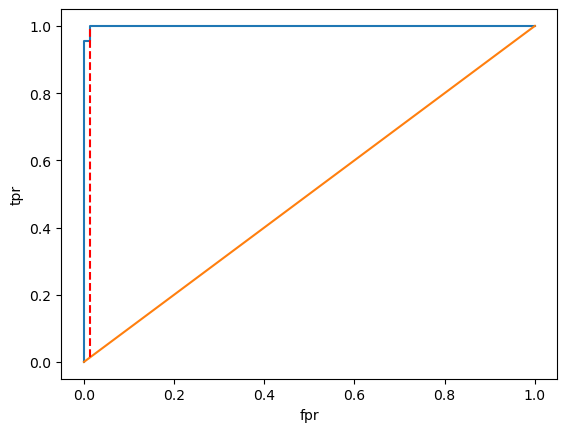

In [20]:
# get ROC
from sklearn.metrics import auc, roc_curve
fpr, tpr, threshold = roc_curve(train_target, train_pred_logit)
auroc = auc(fpr, tpr)
print(f"AUROC : {auroc:.4f}")
# find the best threshold by Youden's index
idx = np.argmax(tpr - fpr)
best_threshold = threshold[idx]
print(f"best threshold is : {best_threshold:.4f}")
print(f"best sensitivity is : {tpr[idx]:.4f}")
print(f"best specificity is : {1-fpr[idx]:.4f}")
print(f"best threshold height is : {(tpr - fpr)[idx]:.4f}")

plt.plot(fpr, tpr)
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
plt.plot((fpr[idx], fpr[idx]), (fpr[idx], tpr[idx]), color="red", linestyle="--")
plt.xlabel("fpr")
plt.ylabel("tpr")

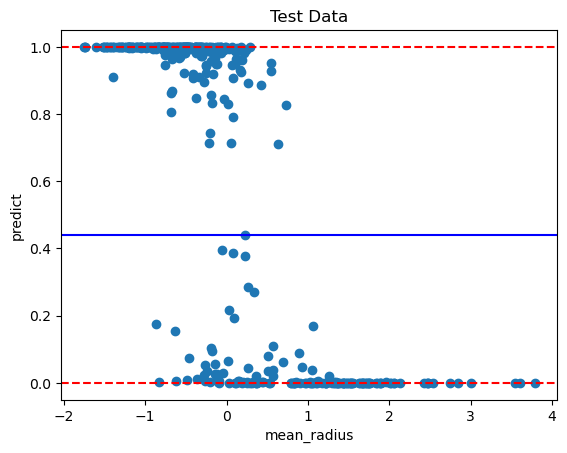

In [21]:
# plot the linear regression result with the best threshold
plt.scatter(x=scaled_train_data[:,0], y=train_pred_logit)
plt.axhline(0, color="red", linestyle="--")
plt.axhline(1, color="red", linestyle="--")
plt.xlabel("mean_radius")
plt.ylabel("predict")
plt.title(f"{name} Data")
plt.axhline(best_threshold, color="blue")

In [22]:
test_pred_logit

array([9.99580975e-01, 9.99985746e-01, 9.92734002e-01, 2.67659549e-13,
       9.99986508e-01, 9.84052285e-02, 9.96336158e-07, 9.99932607e-01,
       8.09110980e-05, 9.99995184e-01, 9.99999650e-01, 7.05611810e-06,
       9.89398639e-01, 5.07811511e-04, 9.99283452e-01, 9.99223320e-01,
       9.37604348e-01, 9.99971921e-01, 9.99964682e-01, 1.04398902e-03,
       9.24245185e-01, 9.78158181e-01, 3.08242339e-04, 9.94837027e-01,
       9.99859671e-01, 9.99360617e-01, 9.99544439e-01, 9.99999999e-01,
       8.76499782e-02, 9.66914794e-01, 9.99923909e-01, 9.99949167e-01,
       9.92032586e-01, 9.99988111e-01, 9.68611775e-09, 8.45020411e-07,
       9.99753118e-01, 6.37029553e-07, 5.55378545e-04, 9.99954048e-01,
       9.99863310e-01, 9.58498693e-01, 9.44062937e-01, 5.50680002e-01,
       9.97958687e-01, 9.16181336e-01, 7.08199625e-05, 9.95537083e-01,
       9.99751992e-01, 9.99995696e-01, 9.74836234e-01, 1.63971039e-05,
       8.99992336e-01, 2.27769842e-04, 9.49367406e-01, 9.99272529e-01,
      

In [23]:
# get the accuracy for train and test by the threshold
train_pred_label = list(map(int, (train_pred_logit > best_threshold)))
test_pred_label = list(map(int, (test_pred_logit > best_threshold)))
from sklearn.metrics import accuracy_score
proba_train_acc = accuracy_score( train_target, train_pred_label )
proba_test_acc = accuracy_score( test_target, test_pred_label )
print(f"train accuracy is : {proba_train_acc:.2f}")
print(f"test accuracy is : {proba_test_acc:.2f}")

train accuracy is : 0.99
test accuracy is : 0.96


In [24]:
# get the accuracy for train and test by the prediction
train_acc = accuracy_score(train_target, train_pred)
test_acc = accuracy_score(test_target, test_pred)
print(f"train accuracy is : {train_acc:.2f}")
print(f"test accuracy is : {test_acc:.2f}")

train accuracy is : 0.99
test accuracy is : 0.97


## Summary

In [25]:
print(f"Linear Regression Test Accuracy: {linear_test_acc:.4f}")
print(f"Logistic Regression predict_proba Test Accuracy: {proba_test_acc:.4f}")
print(f"Logistic Regression predict Test Accuracy: {test_acc:.4f}")

Linear Regression Test Accuracy: 0.9591
Logistic Regression predict_proba Test Accuracy: 0.9649
Logistic Regression predict Test Accuracy: 0.9708
